# Stroke Prediction Dataset
Dataset from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

Analysis done by Rokas Burneika

**Context**

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Attribute Information**
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

***

# 1. Data import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from utilities import *

warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('./healthcare-dataset-stroke-data.csv', index_col=0)

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


We can see that for all features there are 5110 non-null values, but 'bmi' has only 4909. Meaning there are 201 null values in that column.

In [4]:
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
categorical_columns = list(df.columns.drop(numerical_columns))

Splitting features into numerical and categorical.

Some categorical features have valeus labeled as 0 and 1.

I am changing these values to 'Yes' and 'No' for easier evaluation.

In [5]:
labeled_df = df.copy()

labeled_df['hypertension'] = labeled_df['hypertension'].apply(binary_to_labeled)
labeled_df['heart_disease'] = labeled_df['heart_disease'].apply(binary_to_labeled)
labeled_df['stroke'] = labeled_df['stroke'].apply(binary_to_labeled)

labeled_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,Yes,No,Yes,Private,Urban,83.75,NaN,never smoked,No
44873,Female,81.0,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,No
19723,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,No


***

# 2. EDA

## 2.1. Overview of categorical features

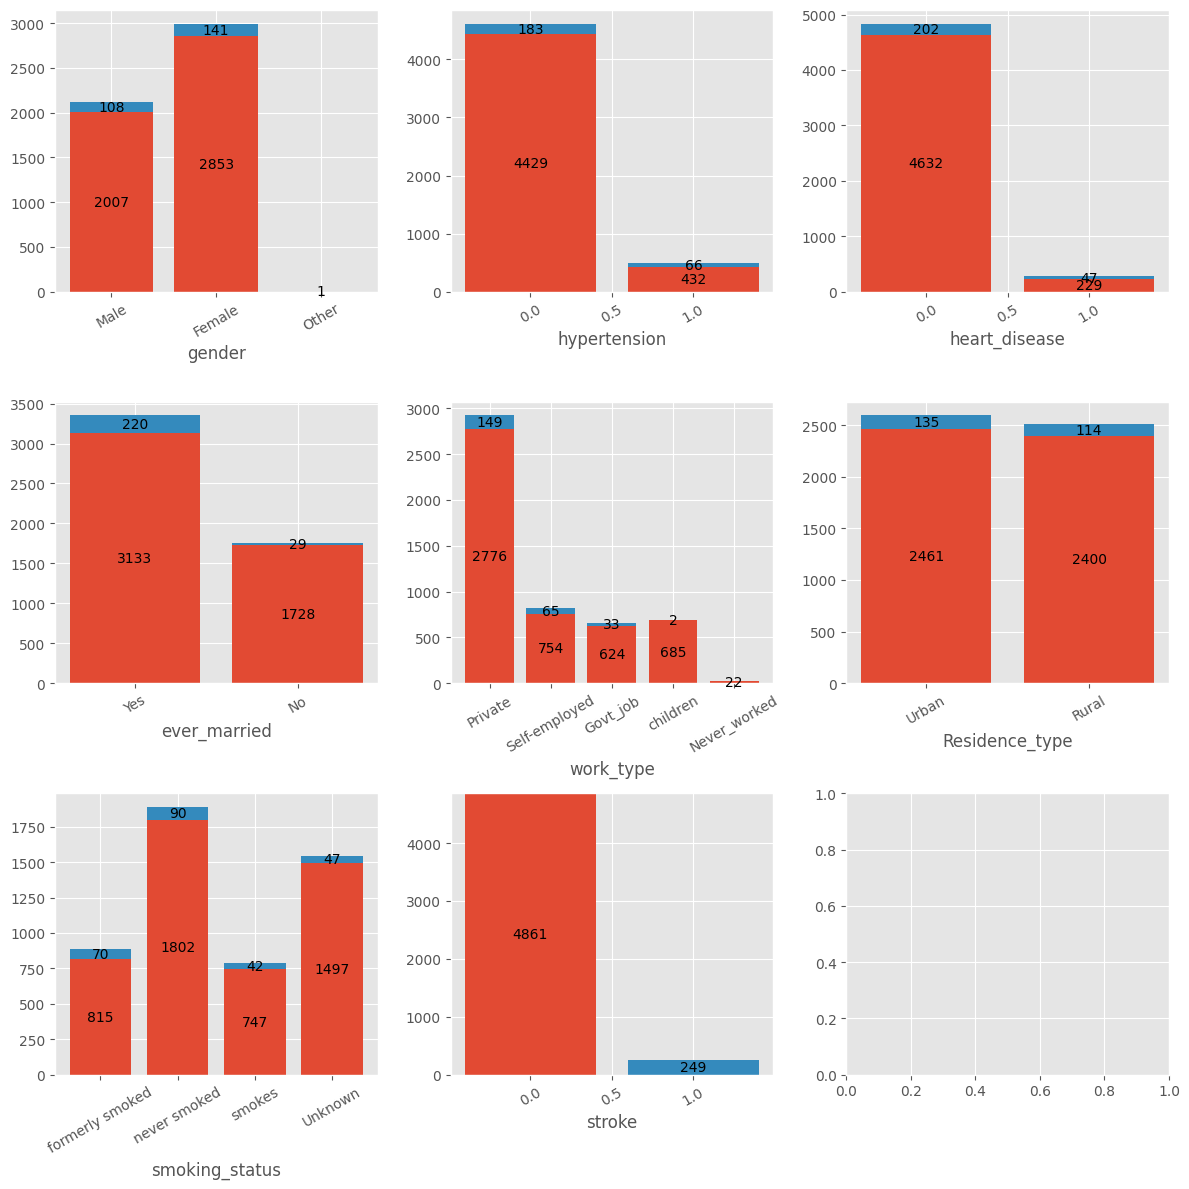

In [6]:
multiple_countplots(df, categorical_columns, 'stroke')

1. Around 3000 of all recordings were female. Others were male and there was a single person that is "other" gender.
2. A majority of people did not have hypertension. Only a tenth had it.
3. Around 1 in 20 people had heart diseases.
4. Around two thirds of surveysts were married at least once. 
5. 2925 people worked in private sector. 819 were self-employed. 657 had a government job. 687 were children and 22 have never worked.
6. Around the same amount of people were living in both urban and rural areas.
7. 1892 people have never smoked in their lives. 885 have quit smoking. 789 were still smoking. There are 1544 unknown records if a person has smoked or not.
8. Only 249 people in this dataset had a stroke, while 4861 others didn't.

Overall, we can see that the dataset is extremely unbalanced regarding our target feature.

## 2.2. Overview of numerical features

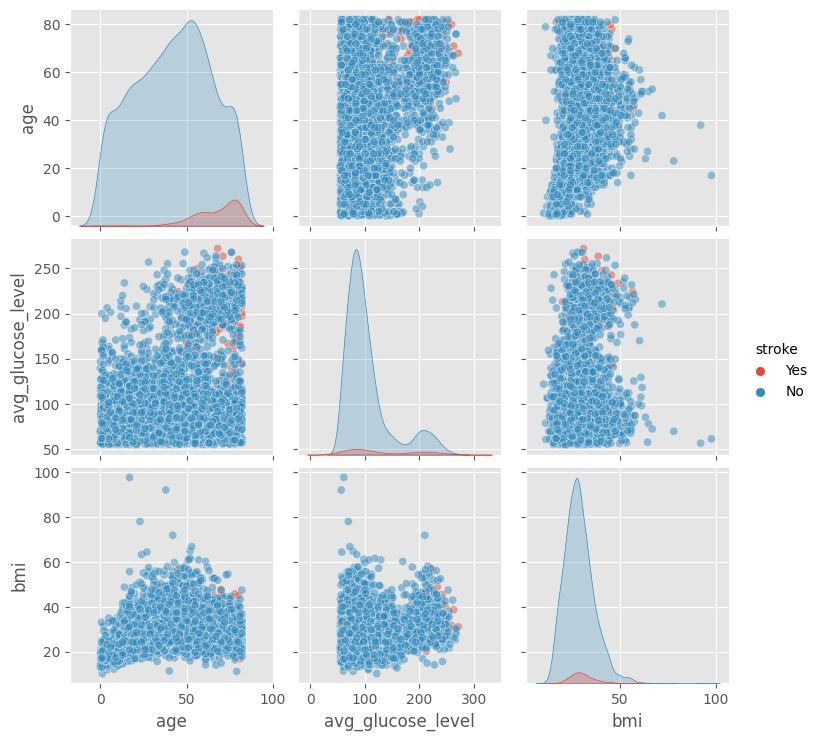

In [7]:
subset = labeled_df[numerical_columns + ['stroke']]

sns.pairplot(subset, plot_kws={'alpha': 0.5}, hue='stroke')
plt.show()

1. We can se that with more age, comes a bigger risk of having a stroke.
2. From bmi vs average glucose level we can see that there are more red spots on the top, meaning people with higher glucose levels tend to get a stroke.

Overall, there aren't many correlations or visible patterns between these features.

# 2.3. Feature correlation with target feature

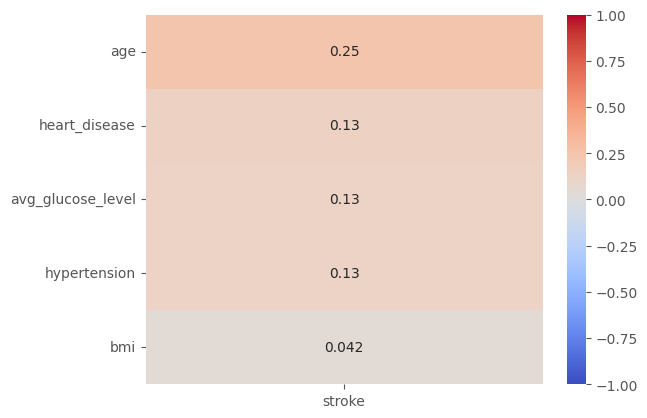

In [8]:
col = df.corr().loc[:, 'stroke'].sort_values(ascending=False)

sns.heatmap(col.to_frame().drop('stroke'), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

plt.show()

Age is most correlated feature with a value of 0.25.

Heart diseases, average glucose level and hypertension have the same correlation with 'stroke' with all being 0.23.

Bmi has a neutral correlation with target feature.

Overall, there aren't any high correlations.

# 3. Data preparation

# 3.1. Adressing null values.

Only 'bmi' column had Null values, but they still need to be dealt with.

I choose to fill them using KNN.

In [9]:
from sklearn.impute import KNNImputer

columns_mask = df.dtypes[df.dtypes != 'object'].index.drop('stroke')

imputer = KNNImputer(n_neighbors=5)

imputed_df = imputer.fit_transform(df[columns_mask])

df[columns_mask] = imputed_df
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.60,formerly smoked,1
51676,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,31.38,never smoked,1
31112,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.50,never smoked,1
60182,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.40,smokes,1
1665,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


# 3.2. Feature engineering

Let's categorize numerical features.

Categorized age values:
- child (< 18)
- adult (18 - 65)
- elder (65+)

    
Categorized BMI value:
- underweight (< 18.5)
- normal (18.5 - 25)
- overweight (25 - 30)
- obese (30 - 35)
- extremely obese (35+)


Categorized average glucose level:
- low (< 70)
- normal (70 - 100)
- prediabetes (100 - 125)
 - diabetes (125+)

In [10]:
df['age_category'] = df['age'].apply(categorize_age)
df['bmi_category'] = df['bmi'].apply(categorize_bmi)
df['avg_glucose_level_category'] = df['avg_glucose_level'].apply(categorize_glucose)

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category,avg_glucose_level_category
id,,,,,,,,,,,,,,
9046,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.60,formerly smoked,1,elder,extremely obese,diabetes
51676,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,31.38,never smoked,1,adult,obese,diabetes
31112,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.50,never smoked,1,elder,obese,prediabetes
60182,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.40,smokes,1,adult,obese,diabetes
1665,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1,elder,normal,diabetes


In [11]:
new_categorical_columns = ['age_category', 'bmi_category', 'avg_glucose_level_category']

Saving a list of new feature labels.

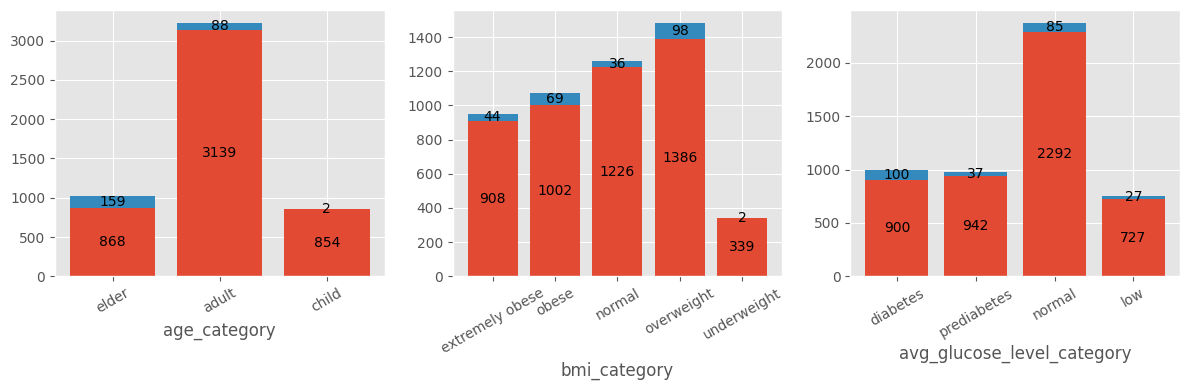

In [12]:
multiple_countplots(df, new_categorical_columns, 'stroke')

1. Most of the people fall under 'adult' age category. 1027 were elders and 856 were children.
2. Biggest group in 'bmi' categories are overweight people. Second is 'normal' with 1262 instances. Obese category has a count of 1071 and extremely obese has 956. Smallest groip is 'underweight' with lowest amount of strokes.
3. Most of the people had normal glucose levels. Around the same amount of people had glucose levels diabetes and prediabetes. Lowest amount of people had low levels of glucose.

In [13]:
categorical_columns += new_categorical_columns

Supplementing a list of categorical columns with newly made ones.

## 3.3. Turning binary string features into ones and zeroes

Turning features that have only two unique values into binary.

But first we have to check unique valules for categorical features.

In [14]:
for feature in categorical_columns:
    print(f'{feature} values: {df[feature].unique()}\n')

gender values: ['Male' 'Female' 'Other']

hypertension values: [0. 1.]

heart_disease values: [1. 0.]

ever_married values: ['Yes' 'No']

work_type values: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Residence_type values: ['Urban' 'Rural']

smoking_status values: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']

stroke values: [1 0]

age_category values: ['elder' 'adult' 'child']

bmi_category values: ['extremely obese' 'obese' 'normal' 'overweight' 'underweight']

avg_glucose_level_category values: ['diabetes' 'prediabetes' 'normal' 'low']



There are only two binary features that are not in 1s and 0s: ever_married and Residence_type

In [15]:
df['Residence_type'] = np.where(df['Residence_type'] == 'Urban', 1, 0)
df['ever_married'] = np.where(df['ever_married'] == 'Yes', 1, 0)

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category,avg_glucose_level_category
id,,,,,,,,,,,,,,
9046,Male,67.0,0.0,1.0,1,Private,1,228.69,36.60,formerly smoked,1,elder,extremely obese,diabetes
51676,Female,61.0,0.0,0.0,1,Self-employed,0,202.21,31.38,never smoked,1,adult,obese,diabetes
31112,Male,80.0,0.0,1.0,1,Private,0,105.92,32.50,never smoked,1,elder,obese,prediabetes
60182,Female,49.0,0.0,0.0,1,Private,1,171.23,34.40,smokes,1,adult,obese,diabetes
1665,Female,79.0,1.0,0.0,1,Self-employed,0,174.12,24.00,never smoked,1,elder,normal,diabetes


The date is prepared for Machine Learning Models.

***

# 4. Machine Learning

From EDA part it is obvious that our dataset is extremely unbalanced.

Therefore, accuracy will not be the main score to look for in our models.

Instead, I will mainly focus on f1 and recall scores of positive class.

Our models will be focused on recall to more correctly predict people that are actually in danger of having a stroke.

In this case we could label everyone as probable to having a stroke and the recall would be 100%. However, we would also like to give out as less false predictions as we can. Thus, we need to be looking at f1 score too.

My main idea is to tune models to as high f1 score as they can get, and then apply some extra tuning to reach as high recall as I can for that f1 score.

# 4.1. Train, Test and Validation Split

Splitting the data into train, test and validation datasets.

These are the splits:
- Train: 60%
- Validation: 20%
- Test: 20%

In [16]:
train, test, validation = np.split(df.sample(frac=1, random_state=42), [int(.6 * len(df)), int(.8 * len(df))])

train_X, train_y = xy_split(train, 'stroke')
test_X, test_y = xy_split(test, 'stroke')
validation_X, validation_y = xy_split(validation, 'stroke')

# 4.2. Importing libraries

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from category_encoders import OneHotEncoder, OrdinalEncoder, PolynomialEncoder, HelmertEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, fbeta_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve

# 4.3. Brute forcing models

In this part, I am making a few lists of scalers, encoders and models.

Using `brute_force_models` function it will try every single combination of scalers, encoders andd models and save their results in a pandas DataFrame.

In [18]:
scalers = [
    StandardScaler(),
    MinMaxScaler(),
    'passthrough'
]

encoders = [
    OneHotEncoder(),
    OrdinalEncoder(),
    PolynomialEncoder(),
    HelmertEncoder()
]

models = [
    SVC(random_state=42, probability=True, class_weight={0: 0.05, 1: 0.95}),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    LogisticRegression(class_weight={0: 0.05, 1: 0.95}, random_state=42),
    RandomForestClassifier(class_weight={0: 0.05, 1: 0.95}, random_state=42),
    XGBClassifier(scale_pos_weight=train_y.value_counts()[0]/train_y.value_counts()[1], random_state=42),
    CatBoostClassifier(class_weights={0: 0.05, 1: 0.95}, iterations=500, learning_rate=0.01, random_seed=42, silent=True)
]

Not to forget to remove the target feature from categorical columns list.

In [19]:
categorical_columns.remove('stroke')
categorical_columns

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'age_category',
 'bmi_category',
 'avg_glucose_level_category']

In [20]:
models_df = brute_force_models(train_X, train_y, categorical_columns, numerical_columns, scalers, encoders, models)

In [21]:
models_df.sort_values(['f1_score', 'recall'], ascending=False).groupby('model').mean()

,accuracy,recall,precision,f1_score
model,,,,
<catboost.core.CatBoostClassifier object at 0x0000013058CD4A90>,0.853957,0.480591,0.168504,0.248080
DecisionTreeClassifier,0.906747,0.141720,0.120941,0.129319
KNeighborsClassifier,0.945885,0.021971,0.129706,0.035940
LogisticRegression,0.743445,0.767168,0.135402,0.229826
RandomForestClassifier,0.949608,0.011290,0.350000,0.021875
SVC,0.751221,0.736039,0.137707,0.230767
XGBClassifier,0.925553,0.127258,0.179000,0.146818


Since we're not gonna look at accuracy, but more focus on recall and f1 score, there are three models that could work well for this task: 
- CatBoost
- LogisticRegression
- SVC. 

# 4.4. Parameters for picked out ML models

In [22]:
models_df[models_df['model'].str.contains('CatBoost')].sort_values('f1_score', ascending=False)[:1]

,encoder,scaler,model,accuracy,recall,precision,f1_score
6,OneHotEncoder,StandardScaler,<catboost.core.CatBoostClassifier object at 0x...,0.852898,0.516774,0.17556,0.260944


For CatBoost we have OneHotEncoder. 

Since CatBoost is gradient boossting on decision trees, scaler is not needed.

In [23]:
models_df[models_df['model'] == 'LogisticRegression'].sort_values('f1_score', ascending=False)[:1]

,encoder,scaler,model,accuracy,recall,precision,f1_score
31,OrdinalEncoder,MinMaxScaler,LogisticRegression,0.763861,0.739355,0.142062,0.238068


LogisticRegression model had the best results with OrdinalEncoder and MinMaxScaler.

In [24]:
models_df[models_df['model'] == 'SVC'].sort_values('f1_score', ascending=False)[:1]

,encoder,scaler,model,accuracy,recall,precision,f1_score
7,OneHotEncoder,MinMaxScaler,SVC,0.799413,0.686667,0.156764,0.254948


SVC model performed best on OneHotEncoder and MinMaxScaler.

# 4.5. Model tuning

Firstly, we must make a scorer, because pre-made scorer count it for both classes. Since our dataset is extremely unbalanced, we need to make a scorer only focused on one class.

I am using F-beta score, which is a weighted F1 score.

In [25]:
scorer = make_scorer(fbeta_score, beta=2, pos_label=1)

### 4.5.1 CatBoost Tuning

**CatBoost Base model**

In [26]:
encoder = OneHotEncoder()

cb_model = CatBoostClassifier(class_weights={0: 0.05, 1: 0.95}, iterations=500, learning_rate=0.01, random_seed=42, silent=True)

cb_pipe = make_pipeline(encoder, cb_model)

cb_pipe.fit(train_X, train_y)

pred_y = cb_pipe.predict(validation_X)

model_report(validation_y, pred_y)

Accuracy:
	 0.8571428571428571 

Confusion matrix:
 [[853 126]
 [ 20  23]] 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       979
           1       0.15      0.53      0.24        43

    accuracy                           0.86      1022
   macro avg       0.57      0.70      0.58      1022
weighted avg       0.94      0.86      0.89      1022
 



From base CatBoost model we get an f1 score of 0.24 and recall of 0.53 for class 1.

**CatBoost model tuning using GridSearchCV**

In [27]:
params = {
    'learning_rate': [0.03, 0.1],
    'depth': [4, 6, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

skf = StratifiedKFold(n_splits=5)

cb_model_gs = GridSearchCV(
    cb_model,
    params,
    cv=skf,
    scoring=scorer,
    n_jobs=-1
)

cb_pipe_tuned = make_pipeline(encoder, cb_model_gs)

cb_pipe_tuned.fit(train_X, train_y)

pred_y = cb_pipe_tuned.predict(validation_X)

model_report(validation_y, pred_y)

Accuracy:
	 0.8493150684931506 

Confusion matrix:
 [[843 136]
 [ 18  25]] 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92       979
           1       0.16      0.58      0.25        43

    accuracy                           0.85      1022
   macro avg       0.57      0.72      0.58      1022
weighted avg       0.94      0.85      0.89      1022
 



After applying GridSearchCV we get a model with f1 score being 0.26 and recall being 0.63.

**CatBoost Precision Recall vs Threshold**

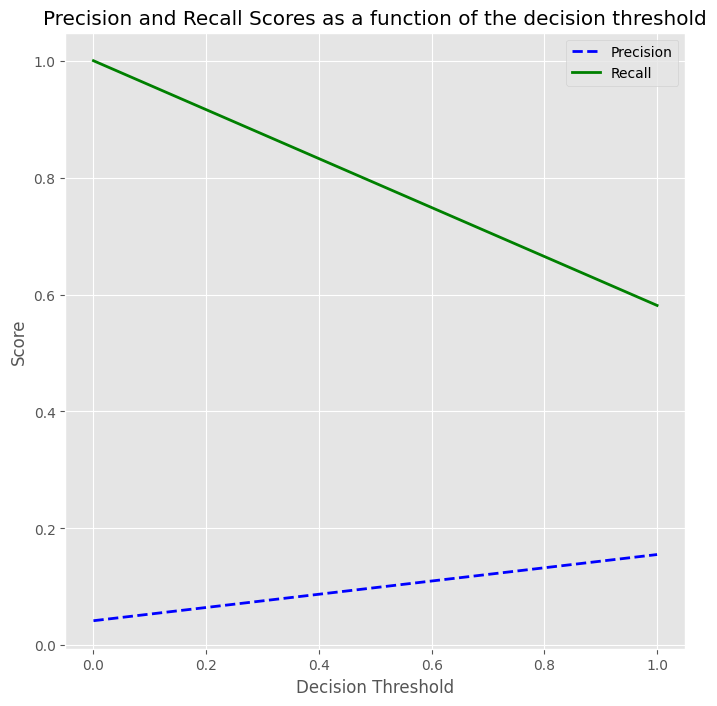

In [28]:
precisions, recalls, thresholds = precision_recall_curve(validation_y, pred_y)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

Recall for this model is high and precision is low.

**CatBoost Threshold Tuning**

Trying to tune the model to get the highest f1 score as well as recall.

In [29]:
pred_y = cb_pipe.predict_proba(validation_X)
pred_y = pred_y[:, 1]

cb_threshold = 0.6

adjusted_y = adjust_class(pred_y, cb_threshold)

model_report(validation_y, adjusted_y)

Accuracy:
	 0.8933463796477495 

Confusion matrix:
 [[892  87]
 [ 22  21]] 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94       979
           1       0.19      0.49      0.28        43

    accuracy                           0.89      1022
   macro avg       0.59      0.70      0.61      1022
weighted avg       0.94      0.89      0.91      1022
 



After tuning the threshold, our model sits at 0.28 f1 score and 0.49 recall.

### 4.5.2. LogisticRegression Tuning

**LogisticRegression Base model**

In [30]:
encoder = OrdinalEncoder()

scaler = MinMaxScaler()

lr_model = LogisticRegression(class_weight={0: 0.05, 1: 0.95}, random_state=42)

lr_pipe = make_pipeline(encoder, scaler, lr_model)

lr_pipe.fit(train_X, train_y)

pred_y = lr_pipe.predict(validation_X)

model_report(validation_y, pred_y)

Accuracy:
	 0.7808219178082192 

Confusion matrix:
 [[762 217]
 [  7  36]] 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.78      0.87       979
           1       0.14      0.84      0.24        43

    accuracy                           0.78      1022
   macro avg       0.57      0.81      0.56      1022
weighted avg       0.96      0.78      0.85      1022
 



Base LogisticRegression model give out an f1 score of 0.24 and recall of 0.84.

**Tuning LogisticRegression model using GridSearchCV**

In [31]:
params = {
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],
    'C': np.logspace(-4, 4, 50),
    'penalty': ['l1', 'l2'],
    'class_weight': [{1: w} for w in [1, 2, 4, 6, 10]]
}

skf = StratifiedKFold(n_splits=5)

lr_model_gs = GridSearchCV(
    lr_model,
    params,
    cv=skf,
    scoring=scorer,
    n_jobs=-1
)

lr_pipe_tuned = make_pipeline(encoder, scaler, lr_model_gs)

lr_pipe_tuned.fit(train_X, train_y == 1)

pred_y = lr_pipe_tuned.predict(validation_X)

model_report(validation_y, pred_y)

Accuracy:
	 0.8365949119373777 

Confusion matrix:
 [[828 151]
 [ 16  27]] 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91       979
           1       0.15      0.63      0.24        43

    accuracy                           0.84      1022
   macro avg       0.57      0.74      0.58      1022
weighted avg       0.95      0.84      0.88      1022
 



Tuned model gives an f1 score of 0.24 and recall 0.63.

Meaning the base model did a better job.

**LogisticRegression Precision Recall vs Threshold**

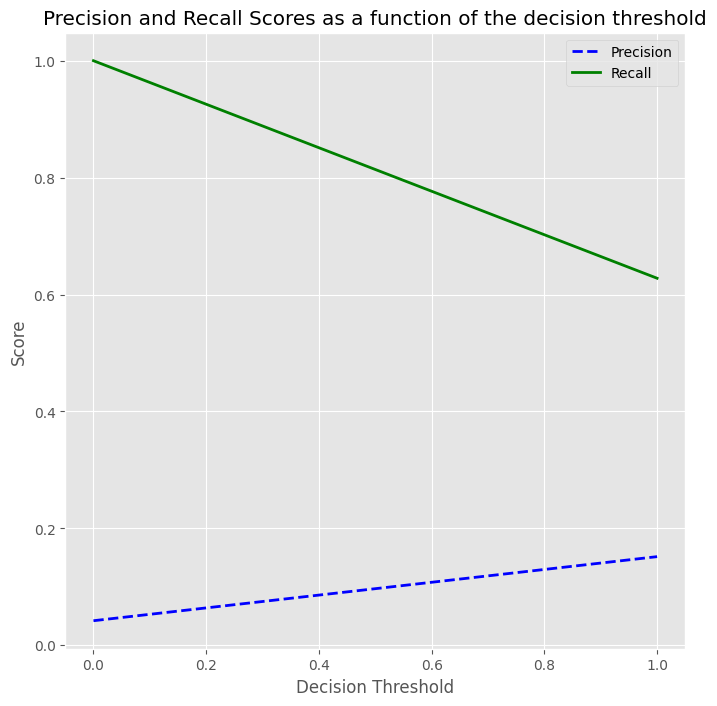

In [32]:
precisions, recalls, thresholds = precision_recall_curve(validation_y, pred_y)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

Similar to CatBoost curve, but recall line is more horizontal and precision is a bit steeper. 

**LogisticRegression Threshold Tuning**

In [71]:
pred_y = lr_pipe.predict_proba(validation_X)
pred_y = pred_y[:, 1]

lr_threshold = 0.66

adjusted_y = adjust_class(pred_y, lr_threshold)

model_report(validation_y, adjusted_y)

Accuracy:
	 0.8463796477495108 

Confusion matrix:
 [[837 142]
 [ 15  28]] 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91       979
           1       0.16      0.65      0.26        43

    accuracy                           0.85      1022
   macro avg       0.57      0.75      0.59      1022
weighted avg       0.95      0.85      0.89      1022
 



Setting the threshhold of LogisticRegression model to 0.66 gives us a model with 0.26 f1 score and 0.65 recall.

### 4.5.3. SVC Tuning

**SVC Base model**

In [34]:
encoder = OneHotEncoder()

scaler = MinMaxScaler()

svc_model = SVC(random_state=42, probability=True, class_weight={0: 0.05, 1: 0.95})

svc_pipe = make_pipeline(encoder, scaler, svc_model)

svc_pipe.fit(train_X, train_y)

pred_y = svc_pipe.predict(validation_X)

model_report(validation_y, pred_y)

Accuracy:
	 0.8062622309197651 

Confusion matrix:
 [[792 187]
 [ 11  32]] 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.81      0.89       979
           1       0.15      0.74      0.24        43

    accuracy                           0.81      1022
   macro avg       0.57      0.78      0.57      1022
weighted avg       0.95      0.81      0.86      1022
 



f1 score: 0.24

recall: 0.74

**SVC model tuning using GridSearchCV**

In [35]:
params = {
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10],
    'C': [0.1, 1, 10]
}

skf = StratifiedKFold(n_splits=5)

svc_model_gs = GridSearchCV(
    svc_model,
    params,
    cv=skf,
    scoring=scorer,
    n_jobs=-1
)

svc_pipe_tuned = make_pipeline(encoder, scaler, svc_model_gs)

svc_pipe_tuned.fit(train_X, train_y == 1)

pred_y = svc_pipe_tuned.predict(validation_X)

model_report(validation_y, pred_y)

Accuracy:
	 0.8228962818003914 

Confusion matrix:
 [[809 170]
 [ 11  32]] 

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90       979
           1       0.16      0.74      0.26        43

    accuracy                           0.82      1022
   macro avg       0.57      0.79      0.58      1022
weighted avg       0.95      0.82      0.87      1022
 



Tuned SVC model has 0.26 f1 score and 0.74 recall.

**SVC Precision Recall vs Threshold**

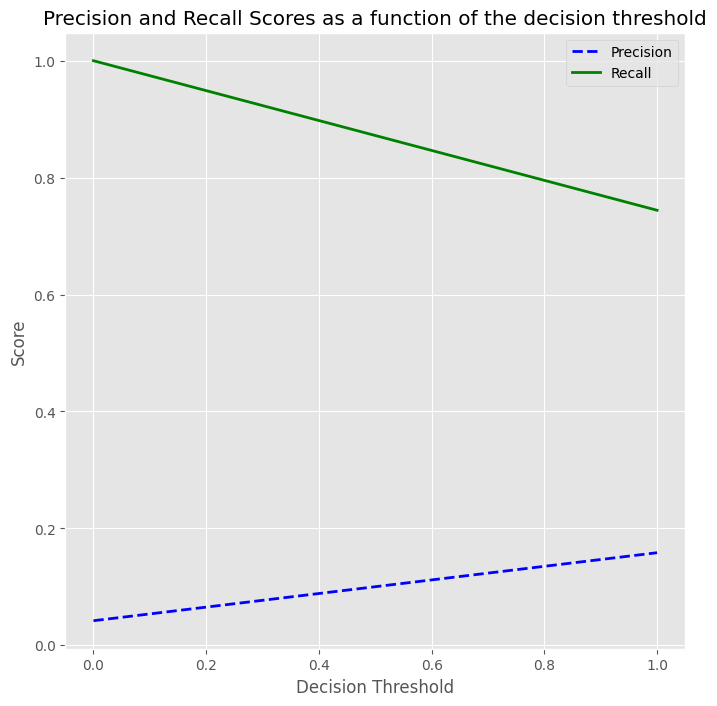

In [36]:
precisions, recalls, thresholds = precision_recall_curve(validation_y, pred_y, pos_label=1)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

Recall line is even more horizontal than for Logistic Regression, but precision is similar.

**SVC Threshold Tuning**

In [74]:
pred_y = svc_pipe_tuned.predict_proba(validation_X)
pred_y = pred_y[:, 1]

svc_threshold = 0.11

adjusted_y = adjust_class(pred_y, svc_threshold)

model_report(validation_y, adjusted_y)

Accuracy:
	 0.8228962818003914 

Confusion matrix:
 [[812 167]
 [ 14  29]] 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90       979
           1       0.15      0.67      0.24        43

    accuracy                           0.82      1022
   macro avg       0.57      0.75      0.57      1022
weighted avg       0.95      0.82      0.87      1022
 



Setting the threshold of SVC model give out an f1 score of 0.24 and recall of 0.67.

## 4.6. Tuned Models vs Test Data

**CatBoost**

In [38]:
pred_y = cb_pipe_tuned.predict_proba(test_X)
pred_y = pred_y[:, 1]

adjusted_y = adjust_class(pred_y, cb_threshold)

model_report(test_y, adjusted_y)

Accuracy:
	 0.8669275929549902 

Confusion matrix:
 [[864 105]
 [ 31  22]] 

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       969
           1       0.17      0.42      0.24        53

    accuracy                           0.87      1022
   macro avg       0.57      0.65      0.59      1022
weighted avg       0.92      0.87      0.89      1022
 



**LogisticRegression**

In [75]:
pred_y = lr_pipe.predict_proba(test_X)
pred_y = pred_y[:, 1]

adjusted_y = adjust_class(pred_y, lr_threshold)

model_report(test_y, adjusted_y)

Accuracy:
	 0.8268101761252447 

Confusion matrix:
 [[816 153]
 [ 24  29]] 

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90       969
           1       0.16      0.55      0.25        53

    accuracy                           0.83      1022
   macro avg       0.57      0.69      0.57      1022
weighted avg       0.93      0.83      0.87      1022
 



**SVC**

In [76]:
pred_y = svc_pipe_tuned.predict_proba(test_X)
pred_y = pred_y[:, 1]

adjusted_y = adjust_class(pred_y, svc_threshold)

model_report(test_y, adjusted_y)

Accuracy:
	 0.8052837573385518 

Confusion matrix:
 [[791 178]
 [ 21  32]] 

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89       969
           1       0.15      0.60      0.24        53

    accuracy                           0.81      1022
   macro avg       0.56      0.71      0.57      1022
weighted avg       0.93      0.81      0.85      1022
 



Model with highest f1 score is LogisticRegressions, however, SVC has an f1 score smaller by only 0.01, but recall higher by 0.05.

Therefore, I think SVC model suits us better.

## 4.6. Final Model

In [77]:
pred_y = svc_pipe_tuned.predict_proba(test_X)
pred_y = pred_y[:, 1]

adjusted_y = adjust_class(pred_y, svc_threshold)

model_report(test_y, adjusted_y)

Accuracy:
	 0.8052837573385518 

Confusion matrix:
 [[791 178]
 [ 21  32]] 

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89       969
           1       0.15      0.60      0.24        53

    accuracy                           0.81      1022
   macro avg       0.56      0.71      0.57      1022
weighted avg       0.93      0.81      0.85      1022
 



Our final model is accurate 80% of the time. Has a recall of 60% and f1 score of 0.24.

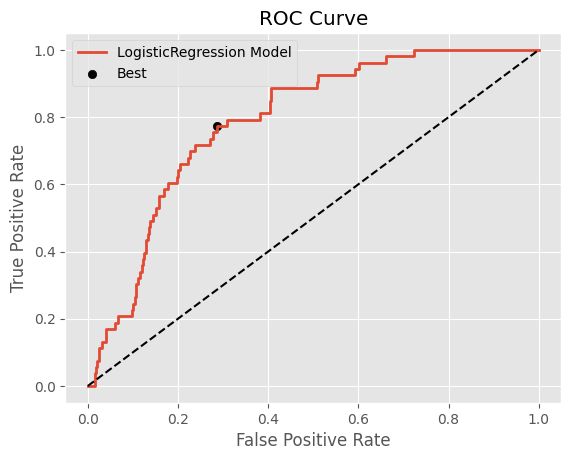

In [78]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_y, pred_y)

plot_roc_curve(fpr, tpr, 'LogisticRegression Model')

## 4.7. Saving Final Model

Saving final model as pickle file.

In [80]:
import pickle

pickle.dump(svc_pipe_tuned, open('./model/app/model.pkl', 'wb'))

# 5. How to improve

1. Need more instances of people who had a stroke.
2. More models could be trained, maybe give Neuran Networks a try.
3. Could try SVC with 'poly' kernel.